In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import figure
from green_concrete.convert import *

%matplotlib inline

**Graphs for SULI Research Paper and Poster Presentation** 

*Evan Sharafuddin*

### Comparison with CEMCAP
#### Import Data

In [2]:
rundir = os.getcwd()

filename = 'CEMENT_BATCH_cemcap_comparison_29-07-2023_18.24.15.csv'
inloc = os.path.join(rundir, 'green_concrete\\outputs', filename)
outloc = os.path.join(rundir, 'green_concrete\\outputs\\plots')

f = pd.read_csv(inloc)
f.drop('Unnamed: 0', axis=1, inplace=True)

cols = ['Unnamed: 2', 'Unnamed: 4']
data = f[cols]
my_model_cost = [round(n) for n in f['Unnamed: 2'].values]
my_model_emissions = [round(n) for n in f['Unnamed: 4'].values]

# source for the following: CEMCAP d4.6
cemcap_cost = [round(n) for n in eur2014(1, *[46, 68.4, 77.8])]
cemcap_emissions = [round(n) for n in [850, (110-99)/(1e6/8760)/.737*1e3, 48]] # middle: t/h * h/t cli * cli/cem * kg/t = kg co2/t cem

#### Create figure

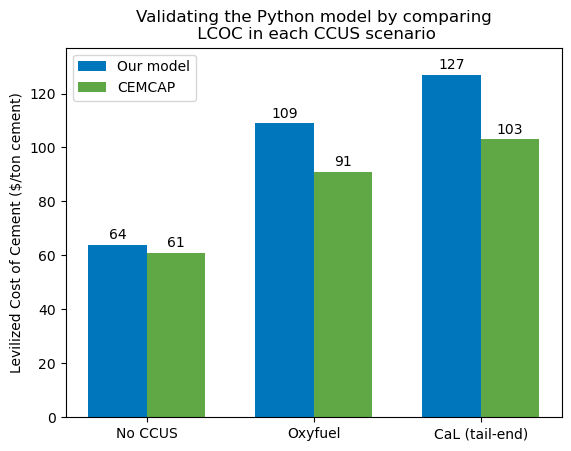

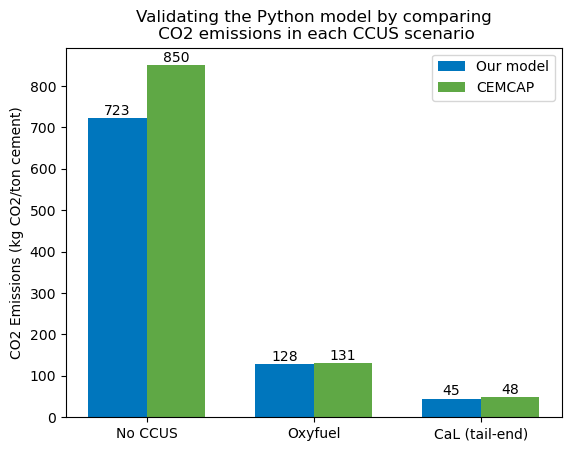

In [12]:
### Costs

# Set the width of the bars
bar_width = 0.35
# figure(figsize=(4, 3), dpi=800)
group_labels = ['No CCUS', 'Oxyfuel', 'CaL (tail-end)']

# Create an array for the x-axis positions of the bars
x = np.arange(len(group_labels))

# Create the bar plot with two adjacent columns for each group
plt.bar(x - bar_width/2, my_model_cost, width=bar_width, label='Our model', color='#0076BD')
plt.bar(x + bar_width/2, cemcap_cost, width=bar_width, label='CEMCAP', color='#5FA845')

# Add labels and title
plt.ylabel('Levilized Cost of Cement ($/ton cement)')
plt.title('Validating the Python model by comparing\n LCOC in each CCUS scenario')
plt.xticks(x, group_labels)
plt.legend()

for i, v1, v2 in zip(x, my_model_cost, cemcap_cost):
    plt.text(i - bar_width/2, v1 + 1, str(v1), ha='center', va='bottom', color='black')
    plt.text(i + bar_width/2, v2 + 1, str(v2), ha='center', va='bottom', color='black')

plt.ylim(top=max(max(my_model_cost), max(cemcap_cost)) + 10)

plt.savefig(os.path.join(outloc, 'cemcap_comparison_cost.png'), dpi=800)
# Show the plot
plt.show()

### Emissions

# Set the width of the bars
bar_width = 0.35
# figure(figsize=(4, 3), dpi=800)
group_labels = ['No CCUS', 'Oxyfuel', 'CaL (tail-end)']

# Create an array for the x-axis positions of the bars
x = np.arange(len(group_labels))

# Create the bar plot with two adjacent columns for each group
plt.bar(x - bar_width/2, my_model_emissions, width=bar_width, label='Our model', color='#0076BD')
plt.bar(x + bar_width/2, cemcap_emissions, width=bar_width, label='CEMCAP', color='#5FA845')

# Add labels and title
plt.ylabel('CO2 Emissions (kg CO2/ton cement)')
plt.title('Validating the Python model by comparing\n CO2 emissions in each CCUS scenario')
plt.xticks(x, group_labels)
plt.legend()

for i, v1, v2 in zip(x, my_model_emissions, cemcap_emissions):
    plt.text(i - bar_width/2, v1 + 1, str(v1), ha='center', va='bottom', color='black')
    plt.text(i + bar_width/2, v2 + 1, str(v2), ha='center', va='bottom', color='black')

# plt.ylim(top=max(max(my_model_emissions), max(cemcap_emissions)) + 15)

plt.savefig(os.path.join(outloc, 'cemcap_comparison_emissions.png'), dpi=800)
# Show the plot
plt.show()